In [1]:
# für Pretty Printing
import pprint as pp

# IPython (Jupyter) setting: 
# Ausgeben jedes Ausdrucks ohne print statt nur des letzten ("last_expr" ist default)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np 
import pandas as pd 

# adjust pandas display options
pd.set_option('display.max_rows', 60) # default 60
# pd.set_option('display.max_col_width', 100) 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.dpi'] = 100

In [4]:
import warnings
warnings.filterwarnings("ignore")

Load data with WEKA sentiment classification

In [5]:
df = pd.read_csv("D:\Studium\Master\IT Projekt\Jupyter Notebook\wekaemotions.csv", sep=',', escapechar='\\', quotechar='\'',  encoding="latin-1")

In [6]:
df.head()

,userid,name,gender,comment,commentid,weekday,mpqaposCount,mpqanegCount,BingLiuposCount,BingLiunegCount,...,NRCHashEmofear,NRCHashEmojoy,NRCHashEmosadness,NRCHashEmosurprise,NRCHashEmotrust,SentiWordnetposScore,SentiWordnetnegScore,EmoticonsposScore,EmoticonsnegScore,NegationnegationCount
0,51,Sanne Grinovero,female,Hi Jan thanks a lot for the test thats very ...,19107,2,1,0,1,0,...,1.337,0.087,0.336,1.207,0.596,0.875,-0.104,0,0,0
1,51,Sanne Grinovero,female,Added comments on the latest code: https://git...,30393,4,0,1,0,1,...,0.514,0.296,0.003,0.652,0.097,0.562,-0.031,0,0,0
2,51,Sanne Grinovero,female,no its not fixed Id keep it alive if you dont...,2313,4,0,1,0,0,...,0.145,0.779,0.165,0.590,0.403,0.683,-1.012,0,0,3
3,51,Sanne Grinovero,female,sorry previous patch was in wrong format. Thi...,29555,3,0,2,0,2,...,0.000,0.000,0.779,0.781,1.846,0.062,-2.912,0,0,0
4,51,Sanne Grinovero,female,no changes needed,29938,3,0,0,0,0,...,0.083,0.626,0.151,0.000,0.047,0.062,-0.385,0,0,1


In [7]:
df.sample(10)

,userid,name,gender,comment,commentid,weekday,mpqaposCount,mpqanegCount,BingLiuposCount,BingLiunegCount,...,NRCHashEmofear,NRCHashEmojoy,NRCHashEmosadness,NRCHashEmosurprise,NRCHashEmotrust,SentiWordnetposScore,SentiWordnetnegScore,EmoticonsposScore,EmoticonsnegScore,NegationnegationCount
941648,30733,Renato Javier MarroquÃ­n Mogrovejo,male,Patch containing documentation for the Giraph-...,1164686,6,0,0,0,0,...,0.053,0.000,0.467,0.307,0.000,0.000,-0.028,0,0,0
200011,7551,Gerhard Petracek,male,after v1 we can collect all information we hav...,1429897,6,0,0,0,0,...,1.065,0.332,0.049,0.186,0.303,1.014,-0.090,0,0,0
541581,14319,Antonio Petrelli,male,Problem fixed added test case for PortletTile...,295297,5,0,1,0,1,...,0.907,0.681,0.000,0.462,0.324,0.412,-0.650,0,0,0
1074741,40832,Michelle Caisse,female,Fixed with revision: 526905,745360,2,0,0,0,0,...,0.455,0.509,0.000,0.858,0.000,0.000,-0.275,0,0,0
185629,7111,Claus Ibsen,male,Steven is there still a problem with the late...,1581340,6,0,1,0,1,...,0.408,0.234,0.003,0.843,0.420,0.104,-1.093,0,0,0
546067,14725,Ian Roughley,male,required WW-765 to work.,215525,6,0,0,1,0,...,0.000,0.263,0.000,0.256,0.000,0.221,0.000,0,0,0
1331410,71565,Roshan Dawrani,male,Reopen anytime you can be sure it is a core gr...,2167830,2,2,0,0,1,...,0.464,0.070,0.232,0.124,2.234,1.759,-0.451,2,0,1
300881,8221,Nigel Daley,male,Iyappan please confirm this is in the documen...,1125528,2,1,0,0,0,...,1.058,1.110,0.631,0.112,0.134,0.614,-0.596,0,0,1
416690,9076,Michael Glavassevich,male,There was no further discussion on this JIRA i...,180911,0,0,1,0,2,...,0.000,0.000,0.151,0.877,1.232,0.271,-1.385,0,0,2
1099253,42519,Rayees Namathponnan,male,Found this issue again in 4.2-forward branch a...,1487657,6,9,51,3,53,...,44.401,34.593,52.739,23.284,12.248,13.472,-36.985,0,-34,4


In [8]:
orig_df = df.copy()

In [9]:
df.describe(include="all")

,userid,name,gender,comment,commentid,weekday,mpqaposCount,mpqanegCount,BingLiuposCount,BingLiunegCount,...,NRCHashEmofear,NRCHashEmojoy,NRCHashEmosadness,NRCHashEmosurprise,NRCHashEmotrust,SentiWordnetposScore,SentiWordnetnegScore,EmoticonsposScore,EmoticonsnegScore,NegationnegationCount
count,1645728.000,1645728,1645728,1645712,1645728.000,1645728.000,1645728.000,1645728.000,1645728.000,1645728.000,...,1645728.000,1645728.000,1645728.000,1645728.000,1645728.000,1645728.000,1645728.000,1645728.000,1645728.000,1645728.000
unique,nan,49357,2,1486170,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,Max Rydahl Andersen,male,+1,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,14004,1594602,5674,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,34409.892,NaN,NaN,NaN,1371433.754,3.312,1.751,1.086,0.904,0.944,...,1.776,1.063,0.803,1.726,1.445,1.643,-1.135,0.055,-0.055,0.631
std,27920.151,NaN,NaN,NaN,743691.108,1.684,4.697,6.727,3.265,4.712,...,8.488,5.590,4.362,6.382,7.606,4.028,4.988,1.790,2.644,2.305
min,51.000,NaN,NaN,NaN,200.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-4222.884,0.000,-2262.000,0.000
25%,8976.000,NaN,NaN,NaN,680685.000,2.000,0.000,0.000,0.000,0.000,...,0.223,0.040,0.000,0.316,0.010,0.158,-1.352,0.000,0.000,0.000
50%,25830.000,NaN,NaN,NaN,1482224.500,3.000,1.000,0.000,0.000,0.000,...,0.845,0.384,0.320,0.851,0.612,0.716,-0.459,0.000,0.000,0.000
75%,58622.000,NaN,NaN,NaN,2024404.500,5.000,2.000,1.000,1.000,1.000,...,2.019,1.145,0.875,1.969,1.636,2.006,-0.073,0.000,0.000,1.000


In [10]:
df.columns

Index(['userid', 'name', 'gender', 'comment', 'commentid', 'weekday',
       'mpqaposCount', 'mpqanegCount', 'BingLiuposCount', 'BingLiunegCount',
       'AFINNposScore', 'AFINNnegScore', 'S140posScore', 'S140negScore',
       'NRCHashSentposScore', 'NRCHashSentnegScore', 'NRC10anger',
       'NRC10anticipation', 'NRC10disgust', 'NRC10fear', 'NRC10joy',
       'NRC10sadness', 'NRC10surprise', 'NRC10trust', 'NRC10negative',
       'NRC10positive', 'NRC10Expandedanger', 'NRC10Expandedanticipation',
       'NRC10Expandeddisgust', 'NRC10Expandedfear', 'NRC10Expandedjoy',
       'NRC10Expandedsadness', 'NRC10Expandedsurprise', 'NRC10Expandedtrust',
       'NRC10Expandednegative', 'NRC10Expandedpositive', 'NRCHashEmoanger',
       'NRCHashEmoanticipation', 'NRCHashEmodisgust', 'NRCHashEmofear',
       'NRCHashEmojoy', 'NRCHashEmosadness', 'NRCHashEmosurprise',
       'NRCHashEmotrust', 'SentiWordnetposScore', 'SentiWordnetnegScore',
       'EmoticonsposScore', 'EmoticonsnegScore', 'Negationn

In [11]:
df['gender'].value_counts()

male      1594602
female      51126
Name: gender, dtype: int64

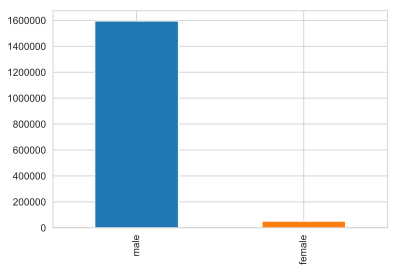

In [12]:
df['gender'].value_counts().plot(kind='bar');

In [13]:
df.isnull().sum()

userid                        0
name                          0
gender                        0
comment                      16
commentid                     0
weekday                       0
mpqaposCount                  0
mpqanegCount                  0
BingLiuposCount               0
BingLiunegCount               0
AFINNposScore                 0
AFINNnegScore                 0
S140posScore                  0
S140negScore                  0
NRCHashSentposScore           0
NRCHashSentnegScore           0
NRC10anger                    0
NRC10anticipation             0
NRC10disgust                  0
NRC10fear                     0
NRC10joy                      0
NRC10sadness                  0
NRC10surprise                 0
NRC10trust                    0
NRC10negative                 0
NRC10positive                 0
NRC10Expandedanger            0
NRC10Expandedanticipation     0
NRC10Expandeddisgust          0
NRC10Expandedfear             0
NRC10Expandedjoy              0
NRC10Exp

In [14]:
df.dtypes

userid                         int64
name                          object
gender                        object
comment                       object
commentid                      int64
weekday                        int64
mpqaposCount                   int64
mpqanegCount                   int64
BingLiuposCount                int64
BingLiunegCount                int64
AFINNposScore                  int64
AFINNnegScore                  int64
S140posScore                 float64
S140negScore                 float64
NRCHashSentposScore          float64
NRCHashSentnegScore          float64
NRC10anger                     int64
NRC10anticipation              int64
NRC10disgust                   int64
NRC10fear                      int64
NRC10joy                       int64
NRC10sadness                   int64
NRC10surprise                  int64
NRC10trust                     int64
NRC10negative                  int64
NRC10positive                  int64
NRC10Expandedanger           float64
N

In [15]:
prep_df = df.copy()

In [16]:
for col, type in zip(df.columns, df.dtypes):
    if type == 'object':
        df[col] = df[col].astype('category')
        
df.dtypes

userid                          int64
name                         category
gender                       category
comment                      category
commentid                       int64
weekday                         int64
mpqaposCount                    int64
mpqanegCount                    int64
BingLiuposCount                 int64
BingLiunegCount                 int64
AFINNposScore                   int64
AFINNnegScore                   int64
S140posScore                  float64
S140negScore                  float64
NRCHashSentposScore           float64
NRCHashSentnegScore           float64
NRC10anger                      int64
NRC10anticipation               int64
NRC10disgust                    int64
NRC10fear                       int64
NRC10joy                        int64
NRC10sadness                    int64
NRC10surprise                   int64
NRC10trust                      int64
NRC10negative                   int64
NRC10positive                   int64
NRC10Expande

In [17]:
encoded_df = df.copy()

One-hot encoding of gender

In [18]:
from sklearn.preprocessing import LabelBinarizer

onehot = LabelBinarizer()

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [20]:
col = 'gender'
code = 'coded_'+col

df[code] = le.fit_transform(df[col])
df[[col, code]].sample(10)

,gender,coded_gender
18924,male,1
317309,female,0
673358,male,1
124234,male,1
293577,male,1
830771,male,1
436422,male,1
1078789,male,1
1372211,male,1
85093,male,1


In [21]:
le.classes_

le.transform(le.classes_)

array(['female', 'male'], dtype=object)

array([0, 1])

In [22]:
df = df[['weekday', 'mpqaposCount', 'mpqanegCount', 'BingLiuposCount', 'BingLiunegCount', 'AFINNposScore', 'AFINNnegScore', 'S140posScore', 'S140negScore', 'NRC10anger', 'NRC10anticipation', 'NRC10disgust', 'NRC10fear', 'NRC10joy', 'NRC10sadness', 'NRC10surprise', 'NRC10trust', 'NRC10negative', 'NRC10positive', 'NRC10Expandedanger', 'NRC10Expandedanticipation', 'NRC10Expandeddisgust', 'NRC10Expandedfear', 'NRC10Expandedjoy', 'NRC10Expandedsadness', 'NRC10Expandedsurprise', 'NRC10Expandedtrust', 'NRC10Expandednegative', 'NRC10Expandedpositive', 'SentiWordnetposScore', 'SentiWordnetnegScore', 'EmoticonsposScore', 'EmoticonsnegScore', 'coded_gender']] 
df.dtypes

weekday                        int64
mpqaposCount                   int64
mpqanegCount                   int64
BingLiuposCount                int64
BingLiunegCount                int64
AFINNposScore                  int64
AFINNnegScore                  int64
S140posScore                 float64
S140negScore                 float64
NRC10anger                     int64
NRC10anticipation              int64
NRC10disgust                   int64
NRC10fear                      int64
NRC10joy                       int64
NRC10sadness                   int64
NRC10surprise                  int64
NRC10trust                     int64
NRC10negative                  int64
NRC10positive                  int64
NRC10Expandedanger           float64
NRC10Expandedanticipation    float64
NRC10Expandeddisgust         float64
NRC10Expandedfear            float64
NRC10Expandedjoy             float64
NRC10Expandedsadness         float64
NRC10Expandedsurprise        float64
NRC10Expandedtrust           float64
N

In [23]:
label = 'coded_gender'

In [24]:
X_train = df[[c for c in df.columns if c != label]]
X_train.sample(20)

,weekday,mpqaposCount,mpqanegCount,BingLiuposCount,BingLiunegCount,AFINNposScore,AFINNnegScore,S140posScore,S140negScore,NRC10anger,...,NRC10Expandedjoy,NRC10Expandedsadness,NRC10Expandedsurprise,NRC10Expandedtrust,NRC10Expandednegative,NRC10Expandedpositive,SentiWordnetposScore,SentiWordnetnegScore,EmoticonsposScore,EmoticonsnegScore
1168613,0,0,0,1,0,0,0,3.541,-1.969,0,...,0.147,0.080,0.084,0.410,0.670,0.886,0.000,-0.425,0,0
398305,4,1,0,0,0,3,0,8.355,-4.298,0,...,2.081,0.787,0.881,2.351,5.569,5.051,0.825,-0.158,2,0
1461238,2,1,1,0,1,0,0,6.953,-8.761,0,...,0.966,1.258,0.839,1.509,8.387,3.792,0.850,-2.167,0,0
887084,4,0,0,0,1,0,0,2.651,-4.558,0,...,0.390,0.366,0.243,0.887,3.318,2.520,0.062,-0.619,0,0
1639888,6,0,0,0,1,0,0,1.974,-1.370,0,...,0.044,0.135,0.036,0.187,1.036,0.334,0.000,-0.028,0,0
117931,4,0,0,0,0,0,0,2.153,-1.484,0,...,0.217,0.215,0.125,0.437,1.517,0.911,0.000,-0.275,0,0
1066771,1,0,0,0,0,0,-1,1.790,-5.621,0,...,0.366,0.484,0.360,0.601,2.722,1.338,0.062,0.000,0,0
689839,3,0,0,0,0,0,0,0.219,-0.942,0,...,0.071,0.039,0.040,0.188,0.296,0.565,0.000,-0.275,0,0
470626,6,7,8,7,8,14,-20,25.665,-31.554,1,...,4.970,5.702,3.855,7.211,36.483,16.846,13.568,-6.059,0,-2
730168,4,4,1,2,1,4,-2,15.308,-8.379,0,...,2.895,2.134,2.042,4.447,15.642,8.913,2.750,-1.886,0,0


In [25]:
y_train = df[label]

In [26]:
label = 'coded_gender'

X = df[[c for c in df.columns if c != label]]
y = df[label]

Split into train and test data

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

dtree_clf = DecisionTreeClassifier(criterion = "gini", 
                                   max_depth=20, 
                                   min_samples_leaf=1,
                                   min_impurity_decrease = 0)

dtree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
y_pred = dtree_clf.predict(X)

97% accuracy because all 3% females are classified as males

In [29]:
correct = np.sum(y == y_pred)
incorrect = np.sum(y != y_pred)
total = len(y)

print("Classified incorrectly: %d out of %d" % (incorrect, total))
print("Accuracy: %.3f%%" % (correct/total*100))

Classified incorrectly: 44985 out of 1645728
Accuracy: 97.267%


In [30]:
from sklearn import metrics

print("Accuracy:  %.5f" % metrics.accuracy_score(y_true=df.coded_gender, y_pred=y_pred))
print("Precision: %.5f" % metrics.precision_score(y_true=df.coded_gender, y_pred=y_pred))
print("Recall:    %.5f" % metrics.recall_score(y_true=df.coded_gender, y_pred=y_pred))
print("F1-Score:  %.5f" % metrics.f1_score(y_true=df.coded_gender, y_pred=y_pred))

Accuracy:  0.97267
Precision: 0.97282
Recall:    0.99972
F1-Score:  0.98609


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def show_metrics(y_true, y_pred, category_names = ["female", "male"]):

    fig, ax = plt.subplots(figsize=(3, 2))
    conf_mat = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=category_names, yticklabels=category_names)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    
    print("Accuracy:  %.5f" % metrics.accuracy_score(y_true, y_pred))
    print("Precision: %.5f" % metrics.precision_score(y_true, y_pred))
    print("Recall:    %.5f" % metrics.recall_score(y_true, y_pred))
    print("F1-Score:  %.5f" % metrics.f1_score(y_true, y_pred))

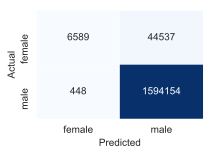

Accuracy:  0.97267
Precision: 0.97282
Recall:    0.99972
F1-Score:  0.98609


In [32]:
show_metrics(df.coded_gender, y_pred)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=127)

print("Training data: %d rows x %d columns" % X_train.shape)
print("Test data:      %d rows x %d columns" % X_test.shape)

Training data: 1316582 rows x 33 columns
Test data:      329146 rows x 33 columns


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=127,
                                                    stratify = y)

print("Anteil male/total")
print("Insgesamt:      %2.2f%%" % (np.sum(y==1)/len(y)))
print("Trainingsdaten: %2.2f%%" % (np.sum(y_train==1)/len(y_train)))
print("Testdaten:      %2.2f%%" % (np.sum(y_test==1)/len(y_test)))

Anteil male/total
Insgesamt:      0.97%
Trainingsdaten: 0.97%
Testdaten:      0.97%


Imbalanced-learn allows us to pretend that the number of males and females in the sample are equal

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
#Source: https://beckernick.github.io/oversampling-modeling/
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=12)

In [37]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [ ]:
dtree_clf = DecisionTreeClassifier(criterion = "gini", 
                                   max_depth=None, 
                                   min_samples_leaf=1,
                                   min_impurity_decrease = 0)

dtree_clf.fit(x_train_res, y_train_res)

In [39]:
y_pred = dtree_clf.predict(X)

In [40]:
correct = np.sum(y == y_pred)
incorrect = np.sum(y != y_pred)
total = len(y)

print("Classified incorrectly: %d out of %d" % (incorrect, total))
print("Accuracy: %.3f%%" % (correct/total*100))

Classified incorrectly: 42001 out of 1645728
Accuracy: 97.448%


In [41]:
print("Accuracy:  %.5f" % metrics.accuracy_score(y_true=df.coded_gender, y_pred=y_pred))
print("Precision: %.5f" % metrics.precision_score(y_true=df.coded_gender, y_pred=y_pred))
print("Recall:    %.5f" % metrics.recall_score(y_true=df.coded_gender, y_pred=y_pred))
print("F1-Score:  %.5f" % metrics.f1_score(y_true=df.coded_gender, y_pred=y_pred))

Accuracy:  0.97448
Precision: 0.99407
Recall:    0.97950
F1-Score:  0.98673


The accuracy is similar but the classification of females in the sample has improved drastically

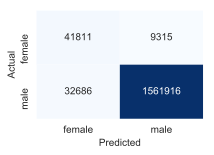

Accuracy:  0.97448
Precision: 0.99407
Recall:    0.97950
F1-Score:  0.98673


In [42]:
show_metrics(df.coded_gender, y_pred)

In [43]:
features_imp = dtree_clf.feature_importances_
print(features_imp)

[0.08063813 0.04948012 0.05719624 0.07515961 0.0182466  0.01702479
 0.01142089 0.03844813 0.03713483 0.0805682  0.04295532 0.01936548
 0.05068101 0.00636843 0.01202324 0.00836212 0.01985485 0.04125813
 0.02155155 0.01652454 0.01902199 0.02040632 0.01564196 0.02227929
 0.01907207 0.02405555 0.02214641 0.02078986 0.01804644 0.06255318
 0.04875372 0.00209107 0.00087993]


In [44]:
#!pip install pydotplus

In [45]:
#!pip install graphviz

In [46]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
import os
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from ipywidgets import interactive, FloatSlider, IntSlider
import re

In [ ]:
os.environ["PATH"] += os.pathsep + 'D:\Programme\Anaconda3\Library\bin\graphviz'


# function for vizualization
def plot_tree(max_depth, min_imp_dec, fig_width):

    fig_height = fig_width
    print(min_imp_dec)
    #dtree_clf = DecisionTreeClassifier(criterion = "gini", 
                                       #max_depth=max_depth, 
                                      # min_samples_leaf=2,
                                      # min_samples_split=4,
                                       #min_impurity_decrease = min_imp_dec
                                      #)

  #  _ = dtree_clf.fit(X_train, y_train)

    graph = Source(tree.export_graphviz(dtree_clf, 
                                        out_file=None, 
                                        # proportion=True,
                                        feature_names=X_train.columns, 
                                        class_names=['male', 'female'],
                                        filled = True))


    # display(SVG(graph.pipe(format='svg')))
    svg = graph.pipe(format='svg').decode()
    svg = re.sub(r'width="(\d+)pt"', 'width="' + str(fig_width) + 'pt"', svg)
    svg = re.sub(r'height="(\d+)pt"', 'height="' + str(fig_height) + 'pt"', svg)
    # svg = re.sub(r'rotate\(0\) rotate\(0\) ', '', svg)

    display(SVG(svg.encode()))

    
# interactive controls with callback to plot_tree function above
inter=interactive(plot_tree, 
                  max_depth=[50, 20, 10, 5, 3],
                  min_imp_dec=FloatSlider(min=0.0, max=0.02, step=0.001, value=0.005),
                  fig_width=IntSlider(value=500, min=300, max=2000, step=100),
                 )

display(inter)